# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib
from scipy.stats import linregress
from pprint import pprint 
from urllib.request import urlopen 
import json as simplejson
import json

from sklearn import datasets
from scipy.stats import linregress


# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

631


In [6]:
#configurations information 
url = "http://api.openweathermap.org/data/2.5/weather?"

#Setting the units to imperieal format
units = "imperial"

#Building the query url 
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Grabbing the weather data 
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()

#printing out the json 
print(json.dumps(weather_json, indent=4))
            

{
    "coord": {
        "lon": -56.15,
        "lat": 72.79
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 17.19,
        "feels_like": 10.02,
        "temp_min": 17.19,
        "temp_max": 17.19,
        "pressure": 996,
        "humidity": 95,
        "sea_level": 996,
        "grnd_level": 996
    },
    "visibility": 7949,
    "wind": {
        "speed": 3.22,
        "deg": 68
    },
    "clouds": {
        "all": 100
    },
    "dt": 1604255335,
    "sys": {
        "country": "GL",
        "sunrise": 1604235449,
        "sunset": 1604253525
    },
    "timezone": -10800,
    "id": 3418910,
    "name": "Upernavik",
    "cod": 200
}


In [7]:

print(requests.get(query_url + city))

<Response [200]>


In [8]:
#empty lists that will hold my city data information 

#city name
city_name = []

#latitude
lat_data = [] 

#longtitude
long_data = [] 

#temperature
max_temp = [] 

#humidity
humidity = [] 

#cloudiness
cloud = [] 

#windiness
wind = []

#country 
country = [] 

#date
date = [] 



# Create a processing record counter 
record_counter = 1

#Printing an alert that notifies the user that we are starting the api log requests 

print(f"BEGINNING OF LOG STATEMENT")
print(f"--------------------------")


#Looping through the list of cities and appending them to the list created above 
for city in cities:


    # exception handling 
    try:
        #Building a query url based on current element units 
        response = requests.get(query_url + city).json()
        
        # Parse out the max temp, humidity, and cloudiness
        city_name.append(response["name"])
        lat_data.append(response["coord"]["lat"])
        long_data.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_counter = response["name"]
        
        print(f"Processing record {record_counter}|{city_counter}")
        #increaseing the record counter by 1 for each iteration
        record_counter += 1

    # If an error is experienced, skip the city
    except:
        print("City not in list..")
    continue
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")




BEGINNING OF LOG STATEMENT
--------------------------
Processing record 1|Arraial do Cabo
Processing record 2|Punta Arenas
Processing record 3|Leningradskiy
Processing record 4|Busselton
Processing record 5|Nueva Granada
Processing record 6|Kapaa
Processing record 7|Tiksi
Processing record 8|Matara
Processing record 9|Yellowknife
Processing record 10|Santa Maria
City not in list..
Processing record 11|Tura
Processing record 12|Tiarei
Processing record 13|Saint Paul Harbor
Processing record 14|Lillesand
Processing record 15|Cape Town
Processing record 16|Buluang
Processing record 17|Albany
Processing record 18|Mineiros
Processing record 19|Warrnambool
Processing record 20|Kosonsoy
Processing record 21|Caravelas
Processing record 22|Bredasdorp
City not in list..
Processing record 23|Naze
Processing record 24|Salta
Processing record 25|Coquimbo
Processing record 26|Saskylakh
Processing record 27|Carballo
Processing record 28|Jamestown
Processing record 29|Lakhdenpokh'ya
Processing record 

Processing record 249|Mount Isa
Processing record 250|Tías
Processing record 251|Tommot
Processing record 252|Turukhansk
City not in list..
City not in list..
City not in list..
Processing record 253|Touros
City not in list..
Processing record 254|Nizhniy Ufaley
City not in list..
Processing record 255|Neepawa
Processing record 256|Murindó
Processing record 257|Hastings
City not in list..
City not in list..
Processing record 258|Gouyave
Processing record 259|Udaipura
Processing record 260|Martigny District
Processing record 261|Yabēlo
Processing record 262|Kupang
Processing record 263|Tautira
Processing record 264|Souillac
Processing record 265|Port Elizabeth
Processing record 266|Mozarlândia
Processing record 267|Levice
City not in list..
Processing record 268|Kholtoson
Processing record 269|Cutler
Processing record 270|Henties Bay
Processing record 271|Nautla
Processing record 272|Belaya Gora
Processing record 273|Lahaina
Processing record 274|Puerto Carreño
Processing record 275|Man

Processing record 496|Portree
Processing record 497|Auki
Processing record 498|Fairbanks
Processing record 499|La Asuncion
Processing record 500|Bondo
Processing record 501|Pangai
Processing record 502|Vega de Alatorre
City not in list..
Processing record 503|Grindavik
Processing record 504|Dalvik
Processing record 505|St. George's
Processing record 506|Paamiut
Processing record 507|Conde
Processing record 508|Isangel
Processing record 509|Bonthe
Processing record 510|Tarko-Sale
Processing record 511|Namatanai
Processing record 512|Clyde
Processing record 513|Harwich
City not in list..
Processing record 514|Abashiri
Processing record 515|Jagraon
Processing record 516|Ancud
Processing record 517|Petropavlivka
Processing record 518|Dunedin
Processing record 519|Egvekinot
Processing record 520|Wasilla
Processing record 521|San Jose
Processing record 522|Adrar
Processing record 523|Batatais
City not in list..
Processing record 524|Vila do Maio
Processing record 525|Trairi
Processing record

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
#Creating the data frame with the appended information above 
city_df = pd.DataFrame({
    'City':city_name,
    'Latitude':lat_data,
    'Longtitude':long_data, 
    'Max Temp':max_temp,
    'Humidity':humidity,
    'Cloudiness':cloud,
    'Wind Speed':wind,
    'Country':country,
    'Date':date
})

#finalizing the data frame 
city_df = pd.DataFrame(city_df)

#exporting the frame to a csv 
city_df.to_csv('City_Data.csv',index=False)

city_df

,City,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial do Cabo,-22.97,-42.03,71.60,73,75,25.28,BR,1604255337
1,Punta Arenas,-53.15,-70.92,55.40,66,75,14.99,CL,1604255123
2,Leningradskiy,69.38,178.42,13.62,82,63,5.91,RU,1604255338
3,Busselton,-33.65,115.33,53.01,95,90,6.78,AU,1604255338
4,Nueva Granada,9.80,-74.39,83.25,76,80,5.55,CO,1604255338
...,...,...,...,...,...,...,...,...,...
574,Elizabeth City,36.29,-76.25,70.00,88,98,13.00,US,1604255297
575,Kherālu,23.88,72.62,71.64,25,0,4.05,IN,1604255501
576,Buraidah,26.33,43.98,73.40,35,0,8.05,SA,1604255462
577,Taoudenni,22.68,-3.98,85.01,14,100,10.11,ML,1604255501


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
#There are no cities with the humidity over 100% in this data set 
city_df.describe()

,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,20.244560,15.516477,59.762159,71.084629,53.742660,8.456718,1.604255e+09
std,32.896346,90.399548,23.503443,22.213997,39.395138,6.071944,1.032003e+02
min,-54.800000,-179.170000,-15.210000,10.000000,0.000000,0.160000,1.604255e+09
25%,-5.790000,-63.730000,45.500000,61.000000,10.000000,4.125000,1.604255e+09
50%,23.080000,17.940000,66.200000,76.000000,66.000000,6.930000,1.604255e+09
75%,47.960000,93.360000,78.800000,88.000000,90.000000,11.410000,1.604255e+09
max,78.220000,179.320000,100.240000,100.000000,100.000000,43.620000,1.604256e+09


In [16]:
#double checked to see if there were any cities above 100% humidity

#from the above description we see that the max humidity rests at 100% on the dot 
city_df.loc[city_df['Humidity'] > 100]



,City,Latitude,Longtitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
# Get the indices of cities that have humidity over 100%.


In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This graph tell us that the closer we get a latitude value of 0 to 20 degrees, the more likely the temperature is to rise. 
It is safe to say that location does play a major factor in temperature. 

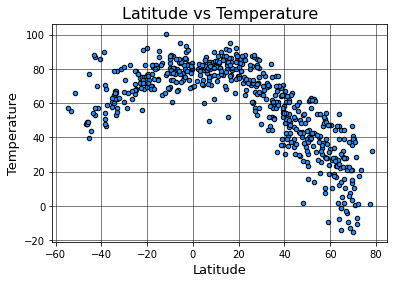

In [19]:
#using the subplot function from matplot lib
#From my understanding it give me more freedom
fig, ax = plt.subplots()

ax.set_title('Latitude vs Temperature',fontsize=16,loc='center',)

city_df.plot(kind='scatter',x='Latitude',y='Max Temp',c='dodgerblue',edgecolor='black',ax=ax)

ax.set_xlabel('Latitude',fontsize=13)

ax.set_ylabel('Temperature',fontsize=13)
            
ax.grid(linestyle='-',linewidth='0.5',color='black')

## Latitude vs. Humidity Plot

The following is the same approach but for humidity. The graph below shows a large cluster of marker at the latitude 
value of 60 degrees. This tells us that there is a high correlation of humidity and those cities located in the 60 degree 
latititude of the world. 

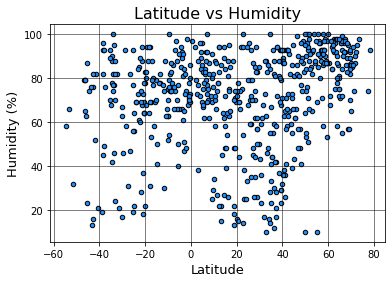

In [20]:
#using the subplot function from matplot lib
#From my understanding it give me more freedom
fig, ax = plt.subplots()

ax.set_title('Latitude vs Humidity',fontsize=16,loc='center',)

city_df.plot(kind='scatter',x='Latitude',y='Humidity',c='dodgerblue',edgecolor='black',ax=ax)

ax.set_xlabel('Latitude',fontsize=13)

ax.set_ylabel('Humidity (%)',fontsize=13)
            
ax.grid(linestyle='-',linewidth='0.5',color='black')

## Latitude vs. Cloudiness Plot

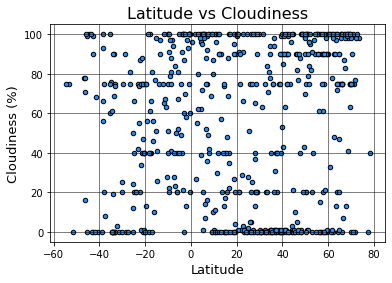

In [21]:
#using the subplot function from matplot lib
#From my understanding it give me more freedom
fig, ax = plt.subplots()

ax.set_title('Latitude vs Cloudiness',fontsize=16,loc='center',)

city_df.plot(kind='scatter',x='Latitude',y='Cloudiness',c='dodgerblue',edgecolor='black',ax=ax)

ax.set_xlabel('Latitude',fontsize=13)

ax.set_ylabel('Cloudiness (%)',fontsize=13)
            
ax.grid(linestyle='-',linewidth='0.5',color='black')

## Latitude vs. Wind Speed Plot

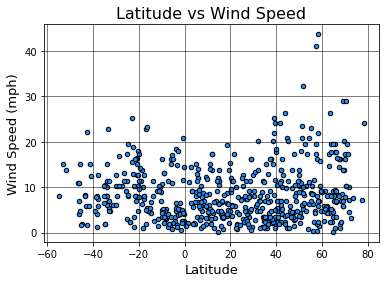

In [22]:
#using the subplot function from matplot lib
#From my understanding it give me more freedom
fig, ax = plt.subplots()

ax.set_title('Latitude vs Wind Speed',fontsize=16,loc='center',)

city_df.plot(kind='scatter',x='Latitude',y='Wind Speed',c='dodgerblue',edgecolor='black',ax=ax)

ax.set_xlabel('Latitude',fontsize=13)

ax.set_ylabel('Wind Speed (mph)',fontsize=13)
            
ax.grid(linestyle='-',linewidth='0.5',color='black')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.73533


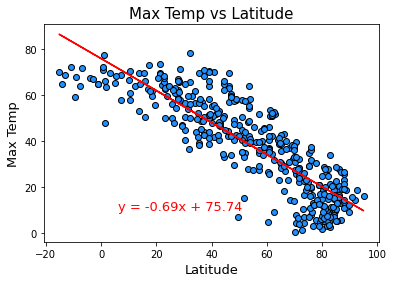

In [23]:
northern_hem = city_df.loc[city_df['Latitude'] >= 0]

northern_hem = pd.DataFrame(northern_hem)

x_values = northern_hem['Max Temp']

y_values = northern_hem['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, c='dodgerblue',edgecolor='black')

plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq,(6,10),fontsize=13,color='red')

plt.xlabel('Latitude',fontsize=13)

plt.ylabel('Max Temp',fontsize=13)


plt.title('Max Temp vs Latitude',fontsize=15)

print(f"The r-squared is: {round(rvalue**2,5)}")

plt.show()




####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.41499


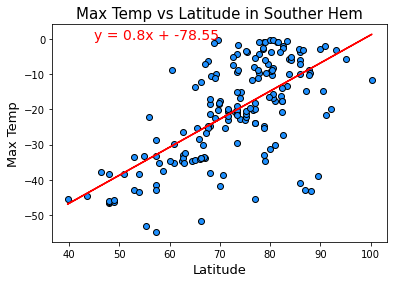

In [26]:
southern_hem = city_df.loc[city_df['Latitude'] < 0]

southern_hem = pd.DataFrame(southern_hem)

x_values = southern_hem['Max Temp']

y_values = southern_hem['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, c='dodgerblue',edgecolor='black')

plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq,(45,0),fontsize=14,color='red')

plt.xlabel('Latitude',fontsize=13)

plt.ylabel('Max Temp',fontsize=13)


plt.title('Max Temp vs Latitude in Souther Hem',fontsize=15)

print(f"The r-squared is: {round(rvalue**2,5)}")

plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08664


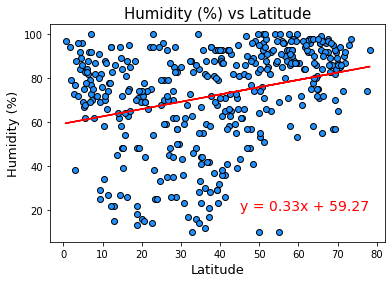

In [27]:
northern_hem = city_df.loc[city_df['Latitude'] >= 0]

northern_hem = pd.DataFrame(northern_hem)

x_values = northern_hem['Latitude']

y_values = northern_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, c='dodgerblue',edgecolor='black')

plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq,(45,20),fontsize=14,color='red')

plt.xlabel('Latitude',fontsize=13)

plt.ylabel('Humidity (%)',fontsize=13)


plt.title('Humidity (%) vs Latitude',fontsize=15)

print(f"The r-squared is: {round(rvalue**2,5)}")

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03605


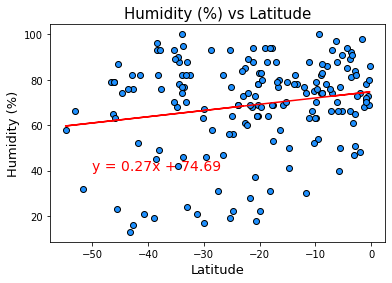

In [28]:
southern_hem = city_df.loc[city_df['Latitude'] < 0]

southern_hem = pd.DataFrame(southern_hem)

x_values = southern_hem['Latitude']

y_values = southern_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, c='dodgerblue',edgecolor='black')

plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq,(-50,40),fontsize=14,color='red')

plt.xlabel('Latitude',fontsize=13)

plt.ylabel('Humidity (%)',fontsize=13)


plt.title('Humidity (%) vs Latitude',fontsize=15)

print(f"The r-squared is: {round(rvalue**2,5)}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01706


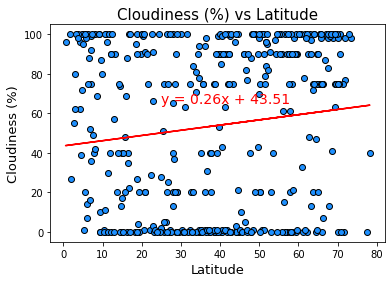

In [29]:
northern_hem = city_df.loc[city_df['Latitude'] >= 0]

northern_hem = pd.DataFrame(northern_hem)

y_values = northern_hem['Cloudiness']

x_values = northern_hem['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, c='dodgerblue',edgecolor='black')

plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq,(25,65),fontsize=14,color='red')

plt.xlabel('Latitude',fontsize=13)

plt.ylabel('Cloudiness (%)',fontsize=13)


plt.title('Cloudiness (%) vs Latitude',fontsize=15)

print(f"The r-squared is: {round(rvalue**2,5)}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05396


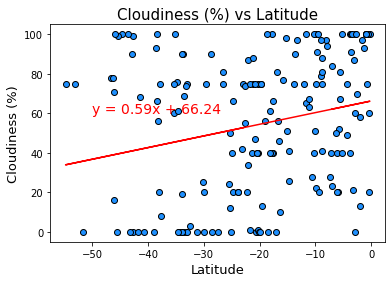

In [31]:
southern_hem = city_df.loc[city_df['Latitude'] < 0]

southern_hem = pd.DataFrame(southern_hem)

y_values= southern_hem['Cloudiness']

x_values = southern_hem['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = cloud_lat * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, c='dodgerblue',edgecolor='black')

plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq,(-50,60),fontsize=14,color='red')

plt.xlabel('Latitude',fontsize=13)

plt.ylabel('Cloudiness (%)',fontsize=13)


plt.title('Cloudiness (%) vs Latitude',fontsize=15)

print(f"The r-squared is: {round(rvalue**2,5)}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04397


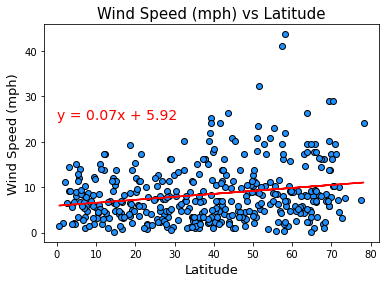

In [32]:
northern_hem = city_df.loc[city_df['Latitude'] >= 0]

northern_hem = pd.DataFrame(northern_hem)

y_values = northern_hem['Wind Speed']

x_values = northern_hem['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, c='dodgerblue',edgecolor='black')

plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq,(0,25),fontsize=14,color='red')

plt.xlabel('Latitude',fontsize=13)

plt.ylabel('Wind Speed (mph)',fontsize=13)


plt.title('Wind Speed (mph) vs Latitude',fontsize=15)

print(f"The r-squared is: {round(rvalue**2,5)}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01712


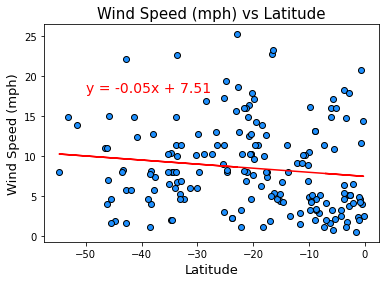

In [33]:
southern_hem = city_df.loc[city_df['Latitude'] < 0]

southern_hem = pd.DataFrame(southern_hem)

y_values = southern_hem['Wind Speed']

x_values = southern_hem['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

regress_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, c='dodgerblue',edgecolor='black')

plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq,(-50,18),fontsize=14,color='red')

plt.xlabel('Latitude',fontsize=13)

plt.ylabel('Wind Speed (mph)',fontsize=13)


plt.title('Wind Speed (mph) vs Latitude',fontsize=15)

print(f"The r-squared is: {round(rvalue**2,5)}")

plt.show()